# **Desafio Cientista de Dados - TEIA**

### Autor - Rodrigo Rodrigues Guimarãis (c128617)

Neste trabalho será realizada a análise exploratória dos dados(EDA) da base “base_churn.csv”. Adicionalmente, serão testados alguns dos modelos mais usuais para predição de churn da instituição financeira em questão.

Após apresentação/tratamento dos dados e aplicação dos modelos será feita a análise do modelo que melhor performou na predição.

In [19]:
#Baixando pacotes para realização do trabalho:

import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight

### **Sobre os dados:**

Segue abaixo a descrição das variáveis (features) da base de dados usada (“base_churn.csv”)

* CustomerId: identificação do cliente;
* Surname: sobrenome do clientes;
* CreditScore: pontuação de credito, 0 alto risco de inadimplência e 1000 clientes com baixo risco de inadimplência;
* Geography: país que o serviço é oferecido;
* Gender: sexo do cliente;
* Age: idade do cleinte;
* Tenure: um indicativo de estabilidade no emprego, em que 0 significa pouca estabilidade e 10 muita estabilidade.
* Balance: saldo da conta corrente;
* NumOfProducts: número de produtos bancários adquiridos;
* HasCrCard: se tem cartão de credito ou não, (Sim = 1 e Não = 0);
* IsActiveMember: se é um cliente com conta ativa, (Ativo = 1) ;
* EstimatedSalary: salário estimado;
* Exited: cliente deixou de ser cliente do banco ou não (Churn = 1);

### **Importação da Base de Dados:**

In [20]:
#Importando base de dados:
base_de_dados = pd.read_csv('base_Churn.csv', encoding='ISO-8859-1')

### **Visualização prévia da base de dados:**

Abaixo conseguimos visualizar as 10 primeiras linhas da base de dados para termos uma primeira visualização dos dados e como eles estão apresentados.


In [21]:
#Visualização das 10 primeiras linhas da base de dados

base_de_dados.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


### **Resumo Estatístico Descritivo dos Dados**

Abaixo, podemos observar uma série de informações estatísticas sobre os dados.

Em ordem:
- Contagem
- Média
- Desvio-padrão
- Valor mínimo
- Primeiro Quartil
- Segundo Quartil
- Terceiro Quartil
- Valor Máximo

In [22]:
#Describe dos dados
base_de_dados.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


### **Verificação de tipo de dados das features**

Para podermos trabalhar com os dados é de extrema importância saber os tipos de dados em cada variável para que seja feito o tratamento necessário.

In [23]:
base_de_dados.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


### **Checagem de NAs**

A verificação de valores ausentes (NAs) e seu tratamento é crucial para evitar erros e previnir vieses nos resultados. 

Podemos observar abaixo que não existem valores ausentes na base “base_churn.csv”.

In [24]:
base_de_dados.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### **Análise Gráfica dos Dados:**

Outro ponto de grande importância na Análise Exploratória de Dados (EDA) é a análise gráfica dos dados. A visualização dos dados de forma gráfica nos ajuda a identificar padrões, detectar outliers e compreender melhor a distribuição.

Para uma melhor visualização (e posterior tratamento), os dados foram dividios em variáveis numéricas e variáveis categóricas.

### **Variáveis Numéricas:**

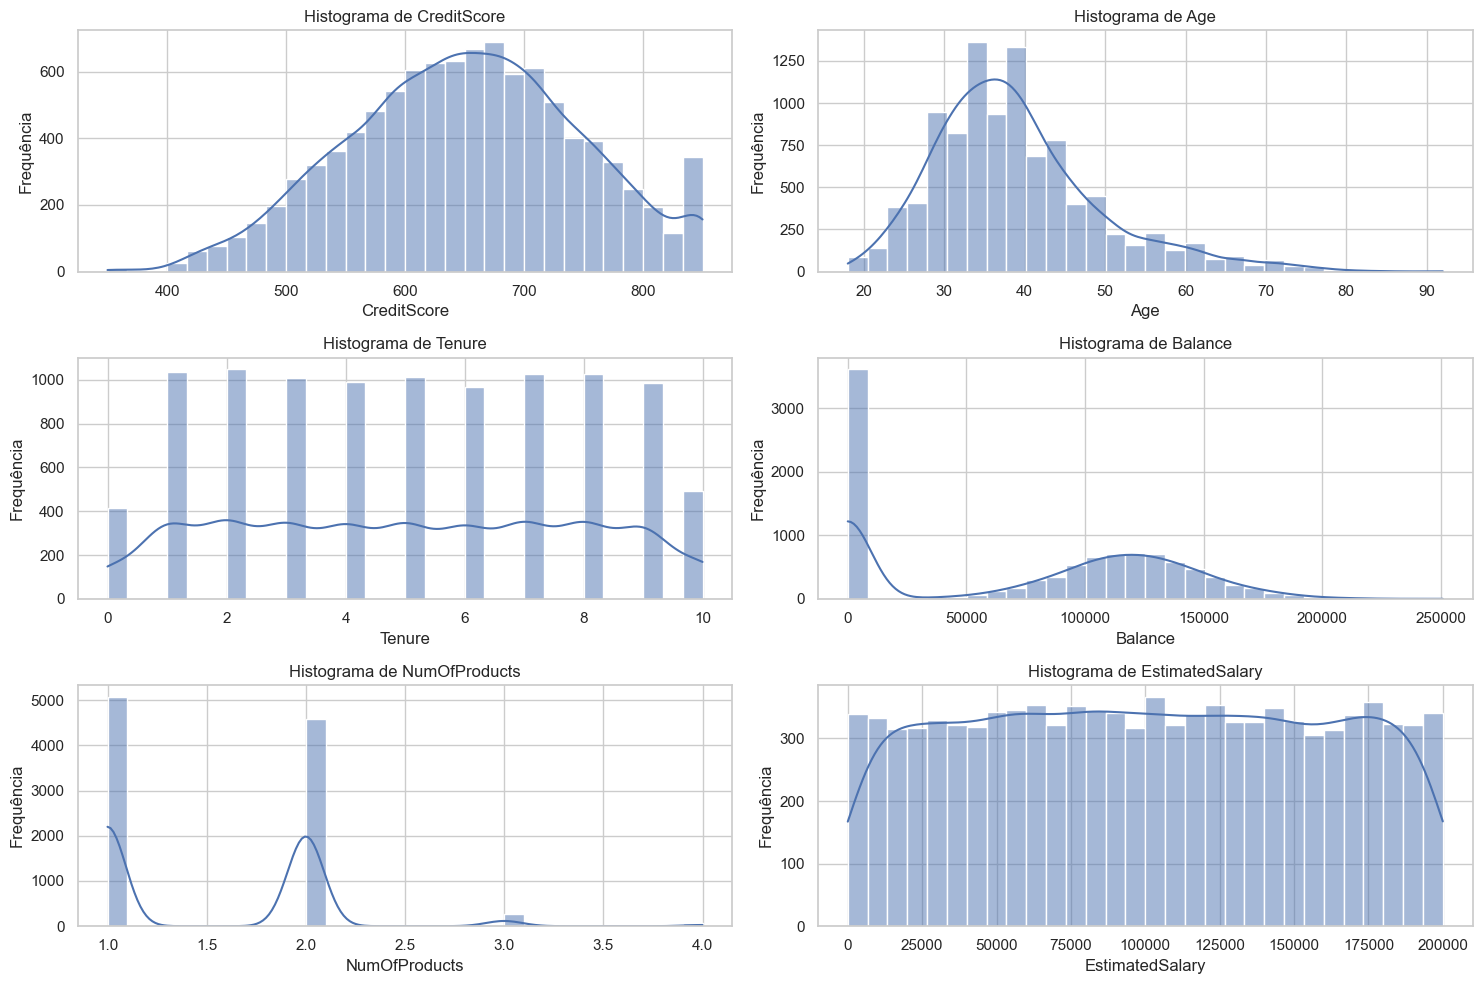

In [25]:
#Features Numéricas

# Estilo do gráfico:
sns.set(style='whitegrid')

# Lista de features numéricas para histograma

features_numericas = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

# Loop para gerar histograma das features numéricas
plt.figure(figsize=(15, 10))
   
for i, feature in enumerate(features_numericas, 1):
    plt.subplot(3, 2, i)
    sns.histplot(base_de_dados[feature], kde=True, bins=30)
    plt.title(f'Histograma de {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequência')

# Ajuste de layout para não sobrepor
plt.tight_layout()
plt.show()



### **Variáveis Categóricas:**

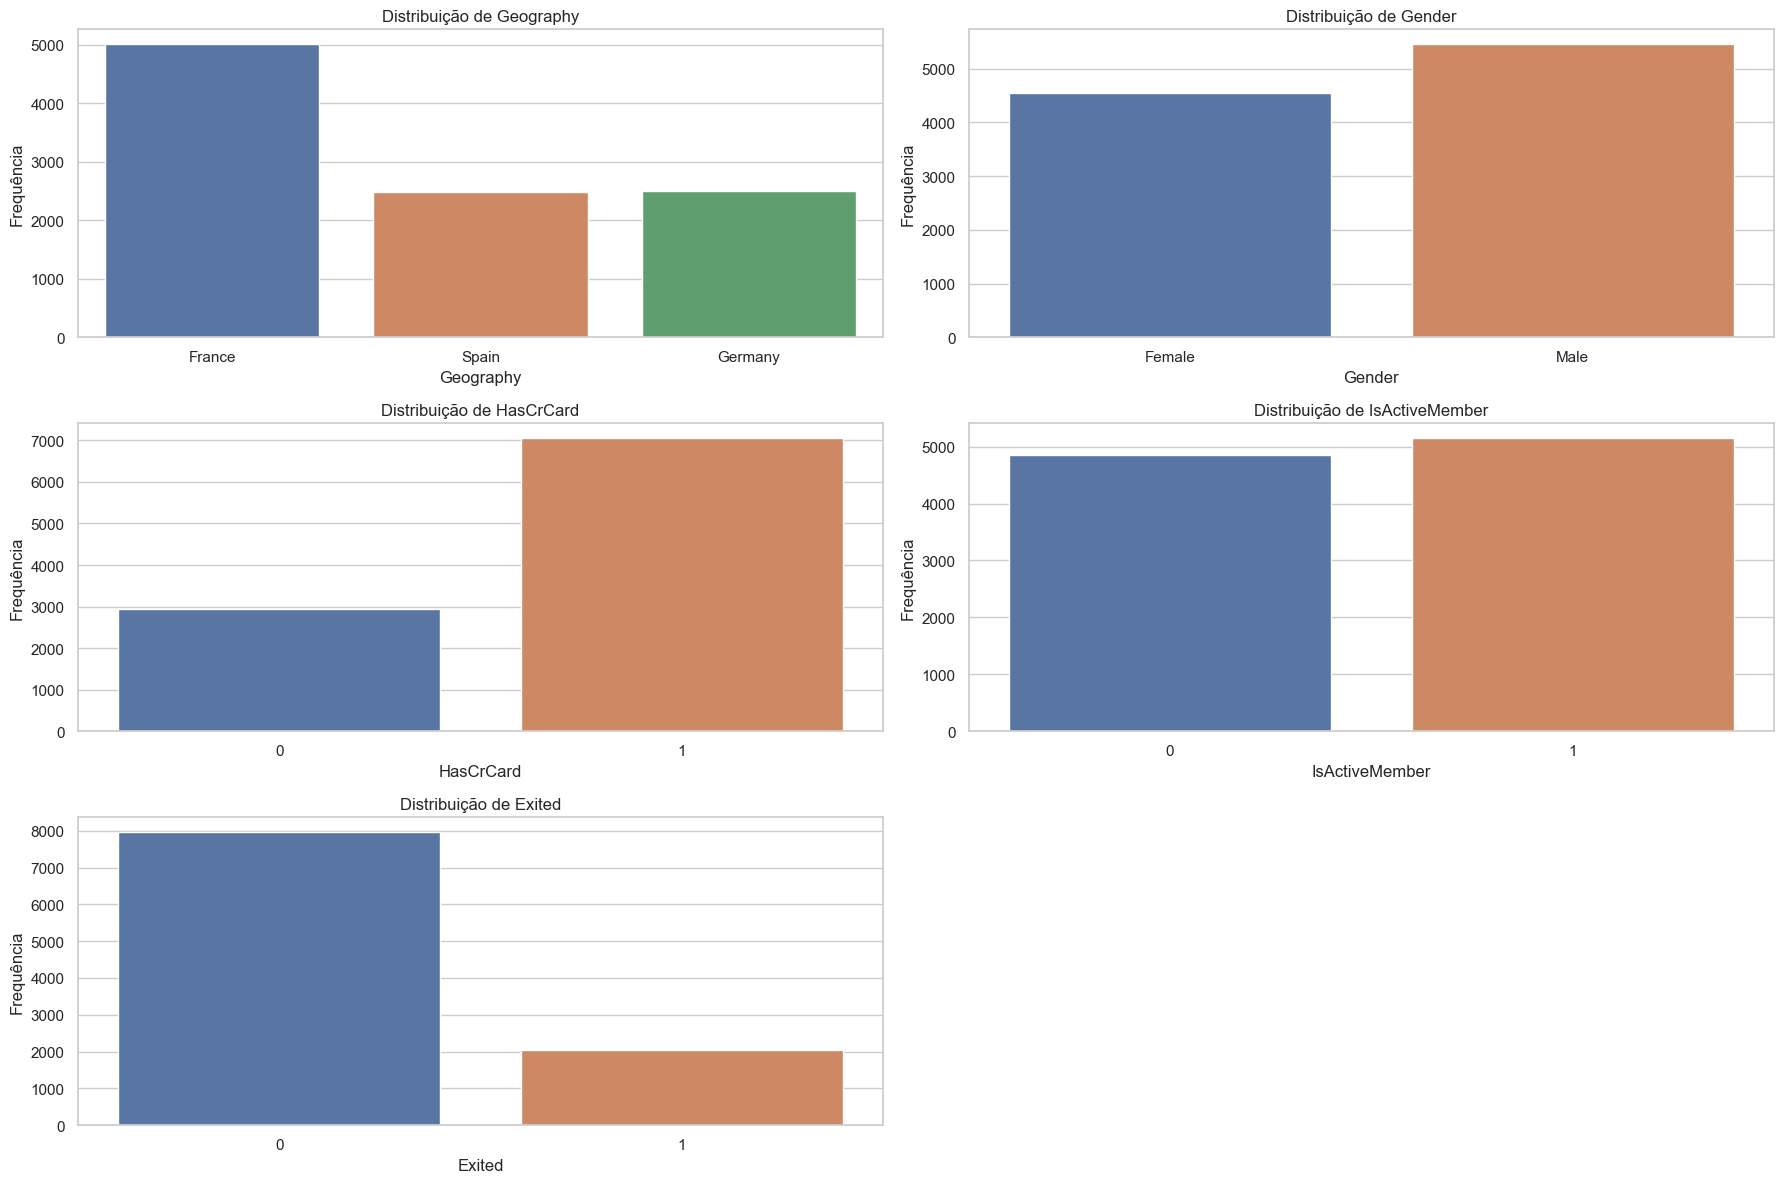

In [26]:
#Features Categóricas
features_categoricas = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'Exited']

# Loop para gerar histograma das features categóricas
plt.figure(figsize=(18, 12))

for i, feature in enumerate(features_categoricas, 1):
    plt.subplot(3, 2, i)
    sns.countplot(x=feature, data=base_de_dados)
    plt.title(f'Distribuição de {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequência')

# Ajuste de layout para não sobrepor
plt.tight_layout()
plt.show()

### **Tratamento dos Dados:**

#### **Removendo featues de Identificação do cliente**

As colunas 'CustomerId' (com o número de identificação do cliente) e a coluna 'Surname' (com o sobrenome dos clientes) são colunas de identificação dos clientes. Dessa forma, elas não contêm informações úteis para prever a variável de interesse.
Além disso, remover essas variáveis ajuda a evitar overfitting  (Incluir identificadores únicos pode levar o modelo a memorizar em vez de generalizar).

In [27]:
# Removendo colunas que não são úteis para o modelo
base_de_dados_para_modelo = base_de_dados.drop(columns=['Surname', 'CustomerId', 'RowNumber'])

### **Tratamento de variáveis categóricas não numéricas:**

Tratar as variáveis categóricas não numéricas e convertê-las para numéricas é fundamental na preparação de dados. Isso se dá principalmente para adequar a base de dados à compatibilidade dos principais modelos de machine learning.

Os algoritmos realizam operações matemáticas (em geral, matrizes ou vetores) que necessitam de valores numéricos. Dessa forma, a conversão dessas variáveis em valores numéricos permite a integração no formato necessário para o treinamento do modelo.

Em nossa base de dados, usamos One-Hot Encoding e criamos dummies para as variáveis 'Geography' (país do cliente) e 'Gender' (sexo).

Após criarmos as dummies, verificamos novamente os tipos dos dados para garantir que a transformação para dados numéricos está correta.



In [28]:
# Codificando variáveis categóricas (Geography e Gender)
dados_codificados = pd.get_dummies(base_de_dados_para_modelo, columns=['Geography', 'Gender'], drop_first=True)

# Convertendo colunas booleanas para inteiros de 64 bits
for column in dados_codificados.columns:
    if dados_codificados[column].dtype == bool:
        dados_codificados[column] = dados_codificados[column].astype(np.int64)

# Verificando se todas as colunas são numéricas após a codificação
print("\nTipos de dados após a codificação:")
print(dados_codificados.dtypes)



Tipos de dados após a codificação:
CreditScore            int64
Age                    int64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Geography_Germany      int64
Geography_Spain        int64
Gender_Male            int64
dtype: object


### **Matriz de correlação:**

Abaixo traçamos a matriz de correlação. Com ela, podemos ter uma representação da relação **linear** entre as variáveis, ajudando a identificar quais variáveis estão relacionadas.

Também nos ajuda a identificar multicolinearidade (duas ou mais variáveis preditoras altamente correlacionadas) em modelos de regressão, o que pode prejudicar a performance do modelo. 

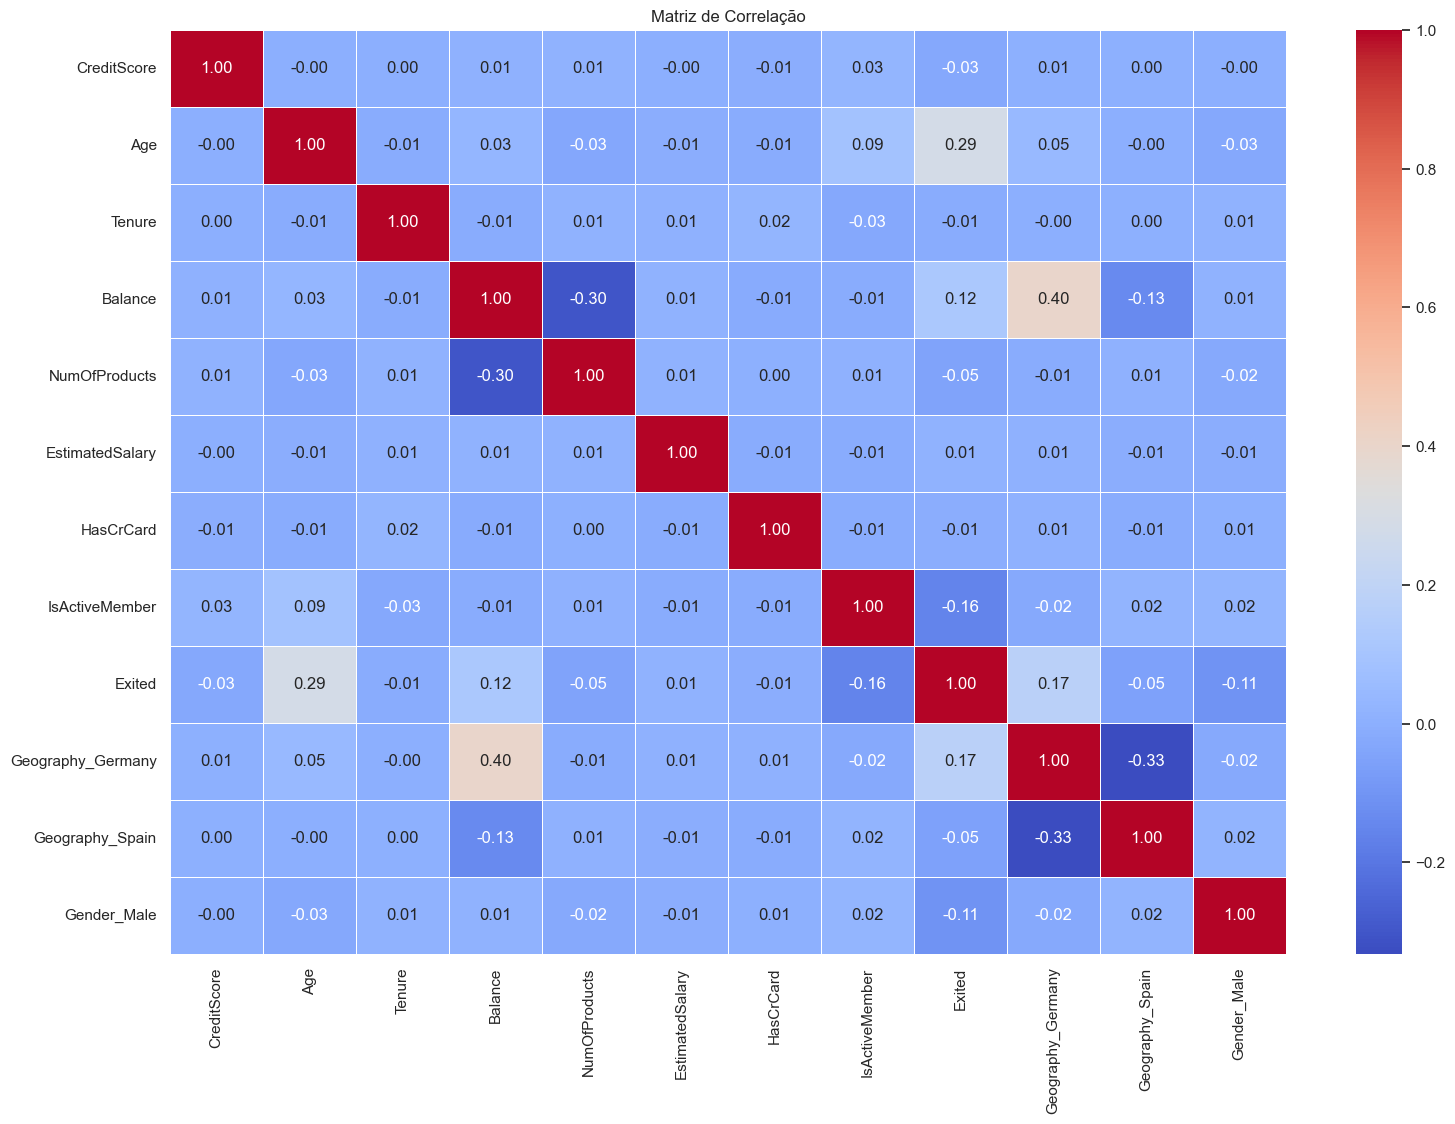

In [29]:
# Incluir as variáveis dummies originais na matriz de correlação
correlation_features = features_numericas + ['HasCrCard', 'IsActiveMember', 'Exited'] + \
                       [col for col in dados_codificados.columns if col not in base_de_dados.columns]

# Traçar a matriz de correlação
plt.figure(figsize=(18, 12))
corr = dados_codificados[correlation_features].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlação')
plt.show()



### **Correlações com a variável 'Exited':**

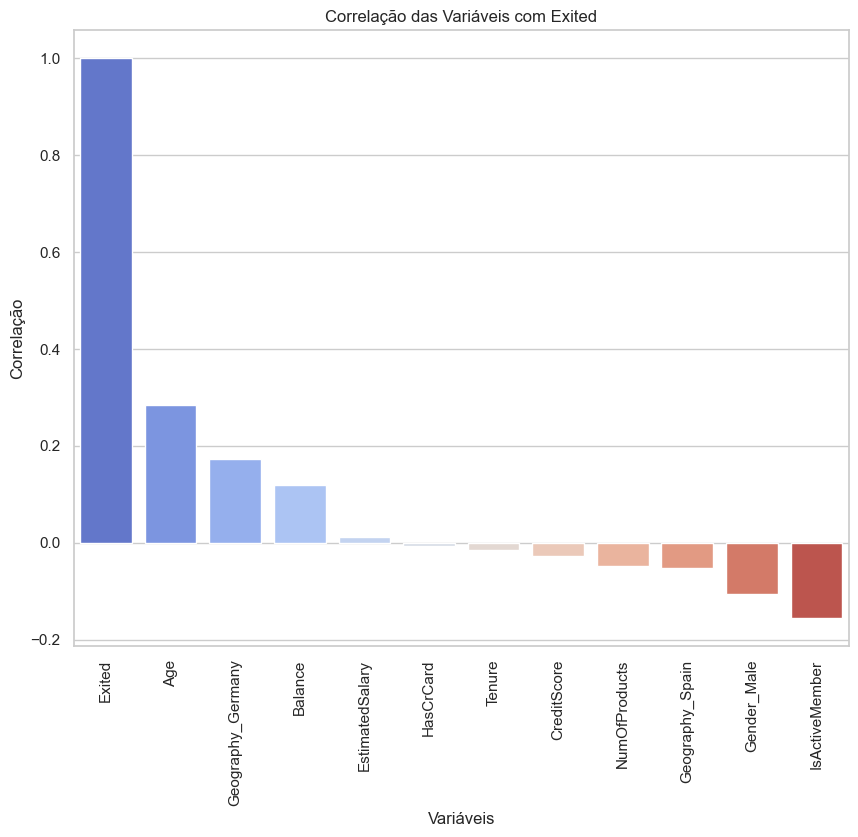

In [30]:
# Destacar correlação com a variável "Exited"
plt.figure(figsize=(10, 8))
cor_target = corr['Exited'].sort_values(ascending=False)
sns.barplot(x=cor_target.index, y=cor_target.values, palette='coolwarm')
plt.title('Correlação das Variáveis com Exited')
plt.xlabel('Variáveis')
plt.ylabel('Correlação')
plt.xticks(rotation=90)
plt.show()

### **Preparação da base de treinamento e base de teste para os modelos:**

Abaixo vamos separar a base de dados em treino e teste. Os modelos serão treinados na base de treino, que contará com 80% da base original. Posteriormente elea serão validos na base de teste (que contará com 20% dos dados).

Para mantermos a consistência de escala e melhorarmos o modelo (em termos de convergência, precisão e redução de bias), normalizaremos os dados.

Para lidarmos com desequilíbrio de classes (onde uma classe é muito mais frequente do que outra) e evitarmos o viés da classe majoritária (temos churn em apenas 20% dos dados) usamos compute_class_weight. Ele dá mais peso aos exemplos da classe minoritária para que o modelo faça os ajustes na classificação desses casos.


In [31]:
# Separando variável dependente e as variáveis independentes
X = dados_codificados.drop('Exited', axis=1)  # variáveis independentes
y = dados_codificados['Exited']  # variável dependente

# Normalizando os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Criando base de treinamento e base de teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Verificando o desequilíbrio de classes
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = {i: class_weights[i] for i in range(len(class_weights))}

# Verificando o tamanho das bases resultantes
print(f'Tamanho da base de treinamento: {X_train.shape[0]}')
print(f'Tamanho da base de teste: {X_test.shape[0]}')


Tamanho da base de treinamento: 8000
Tamanho da base de teste: 2000


### **Metodologia para avaliação dos modelos:**

Enfim, serão rodados os modelos de previsão da feature 'Exited'.

Os modelos serão avaliados pelas seguintes métricas:

    Precisão (accuracy)
A precisão do modelo é calculada com base na fórmula: 
Precisão = TP ÷ (TP + FP), onde:

TP = True Positive - Modelo classificou como verdadeiro e de fato é.
FP = False Positive - Modelo classificou erroneamente como verdadeiro.

Ela representa a proporção de instâncias classificadas corretamente em relação ao total de instâncias no conjunto de dados. 


    Revocação (recall)
A Revocação do modelo é é calculada com base na fórmula: 
Precisão = TP ÷ (TP + FN), onde:

TP = True Positive - Modelo classificou como verdadeiro e de fato é.
FN = False Negative - Modelo classificou erroneamente como falso.

O recall mede a proporção de casos positivos que foram corretamente identificados pelo modelo em relação ao número total de casos positivos.

    F1 Score
O F1-score é uma métrica que combina a precisão e a revocação em uma única medida. Seu cálculo é dado pela média harmônica entre a Precisão e a Revocação.

O F1-score varia entre 0 e 1, onde um valor mais alto indica um melhor desempenho do modelo em termos de precisão e recall.

    ROC AUC score

A ROC AUC (Receiver Operating Characteristic Area Under the Curve) é uma métrica utilizada para avaliar a qualidade de modelos de classificação.
A curva ROC é uma representação gráfica da taxa de verdadeiros positivos em função da taxa de falsos positivos para diferentes limiares de classificação. 

O ROC AUC score é a área sob essa curva ROC, que varia entre 0 e 1.
O ROC AUC score fornece uma medida da capacidade do modelo de distinguir entre as classes positiva e negativa, independentemente do ponto de corte escolhido para classificação. Quanto maior o valor do ROC AUC score, melhor o desempenho do modelo. 

De forma geral, os valores podem ser interpretados da seguinte forma:

Um modelo com ROC AUC score próximo a 0.5 indica um desempenho fraco, sem capacidade de distinguir entre as classes.

Um modelo com ROC AUC score próximo a 1 indica um desempenho excelente, capaz de separar perfeitamente as classes.

Valores intermediários indicam um desempenho moderado a bom em termos de discriminação entre as classes.

    Gini score

O Gini score mede a habilidade do modelo de classificação em separar as classes positiva e negativa, considerando a distribuição das probabilidades de classificação.

0 representa a situação em que a distribuição das classes é perfeitamente balanceada, ou seja, o modelo classifica todas as amostras corretamente em ambas as classes.

1 representa a situação em que todas as amostras pertencem a uma única classe, ou seja, o modelo classifica todas as amostras em uma única classe, resultando em um desempenho fraco.

                Modelo         Tipo  Precisão  Revocacao  F1 Score   ROC AUC  \
0  Logistic Regression  Treinamento  0.613675   0.218370  0.322118  0.764457   
1  Logistic Regression        Teste  0.552448   0.201018  0.294776  0.778860   
2    Gradient Boosting  Treinamento  0.844143   0.530414  0.651476  0.910450   
3    Gradient Boosting        Teste  0.750958   0.498728  0.599388  0.870795   
4        Random Forest  Treinamento  0.983812   0.813260  0.890443  0.997794   
5        Random Forest        Teste  0.775510   0.483461  0.595611  0.862961   
6                  SVM  Treinamento  0.544069   0.803528  0.648821  0.897980   
7                  SVM        Teste  0.472669   0.748092  0.579310  0.848163   
8                 k-NN  Treinamento  1.000000   1.000000  1.000000  1.000000   
9                 k-NN        Teste  0.662162   0.374046  0.478049  0.781886   

       Gini  
0  0.528914  
1  0.557721  
2  0.820901  
3  0.741590  
4  0.995588  
5  0.725922  
6  0.795959  
7  0.69

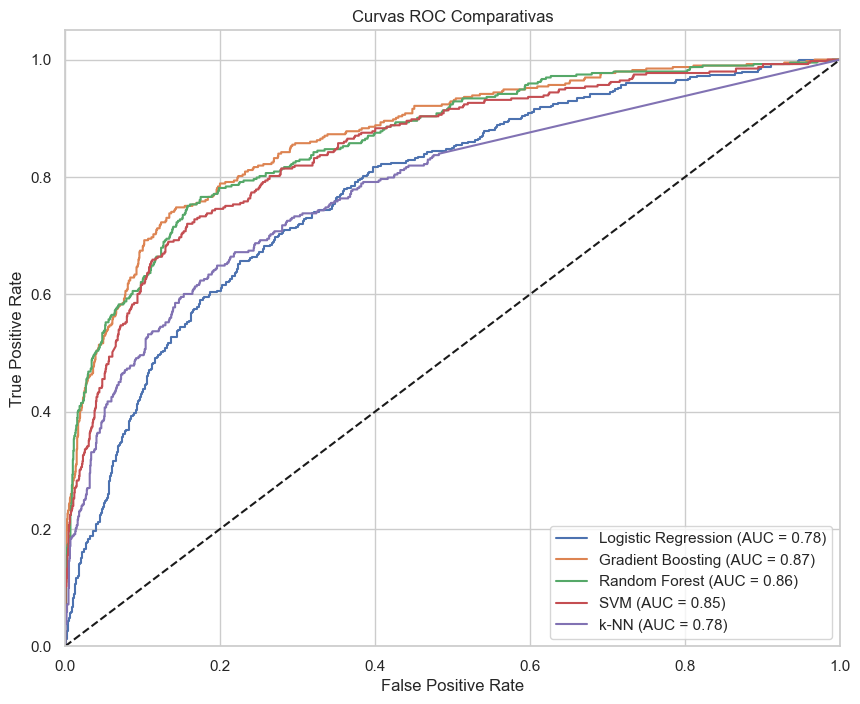

In [32]:
# Função para calcular métricas e adicionar aos resultados
def calcular_metricas(modelo, nome_modelo, tipo, X, y, resultados):
    y_pred = modelo.predict(X)
    precisao = precision_score(y, y_pred, zero_division=0)
    revocacao = recall_score(y, y_pred)
    f1 = f1_score(y, y_pred)
    roc_auc = roc_auc_score(y, modelo.predict_proba(X)[:, 1])
    gini = 2 * roc_auc - 1
    
    resultados['Modelo'].append(nome_modelo)
    resultados['Tipo'].append(tipo)
    resultados['Precisão'].append(precisao)
    resultados['Revocacao'].append(revocacao)
    resultados['F1 Score'].append(f1)
    resultados['ROC AUC'].append(roc_auc)
    resultados['Gini'].append(gini)

# Inicializando um dicionário para armazenar os resultados
resultados = {
    'Modelo': [],
    'Tipo': [],
    'Precisão': [],
    'Revocacao': [],
    'F1 Score': [],
    'ROC AUC': [],
    'Gini': []
}

# Regressão Logística
param_grid_logistic = {
    'penalty': ['l2'],
    'C': [0.001, 0.01, 0.1, 1, 10]
}
modelo_logistic = LogisticRegression(solver='lbfgs', max_iter=1000)
grid_search_logistic = GridSearchCV(modelo_logistic, param_grid_logistic, scoring='accuracy', cv=5, n_jobs=-1)
grid_search_logistic.fit(X_train, y_train)
modelo_logistic_otimizado = grid_search_logistic.best_estimator_
calcular_metricas(modelo_logistic_otimizado, 'Logistic Regression', 'Treinamento', X_train, y_train, resultados)
calcular_metricas(modelo_logistic_otimizado, 'Logistic Regression', 'Teste', X_test, y_test, resultados)

# Gradient Boosting
param_grid_gb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}
modelo_gb = GradientBoostingClassifier()
grid_search_gb = GridSearchCV(modelo_gb, param_grid_gb, scoring='accuracy', cv=5, n_jobs=-1)
grid_search_gb.fit(X_train, y_train)
modelo_gb_otimizado = grid_search_gb.best_estimator_
calcular_metricas(modelo_gb_otimizado, 'Gradient Boosting', 'Treinamento', X_train, y_train, resultados)
calcular_metricas(modelo_gb_otimizado, 'Gradient Boosting', 'Teste', X_test, y_test, resultados)

# Random Forest
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
modelo_rf = RandomForestClassifier(random_state=42)
grid_search_rf = GridSearchCV(modelo_rf, param_grid_rf, scoring='accuracy', cv=5, n_jobs=-1)
grid_search_rf.fit(X_train, y_train)
modelo_rf_otimizado = grid_search_rf.best_estimator_
calcular_metricas(modelo_rf_otimizado, 'Random Forest', 'Treinamento', X_train, y_train, resultados)
calcular_metricas(modelo_rf_otimizado, 'Random Forest', 'Teste', X_test, y_test, resultados)

# SVM
param_grid_svm = {
    'C': [0.1, 1, 10],
    'gamma': [0.1, 0.01, 0.001],
    'kernel': ['rbf']
}
modelo_svm = SVC(probability=True, class_weight=class_weights_dict)
grid_search_svm = GridSearchCV(modelo_svm, param_grid_svm, scoring='accuracy', cv=5, n_jobs=-1)
grid_search_svm.fit(X_train, y_train)
modelo_svm_otimizado = grid_search_svm.best_estimator_
calcular_metricas(modelo_svm_otimizado, 'SVM', 'Treinamento', X_train, y_train, resultados)
calcular_metricas(modelo_svm_otimizado, 'SVM', 'Teste', X_test, y_test, resultados)

# k-Nearest Neighbors
param_grid_knn = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
modelo_knn = KNeighborsClassifier()
grid_search_knn = GridSearchCV(modelo_knn, param_grid_knn, scoring='accuracy', cv=5, n_jobs=-1)
grid_search_knn.fit(X_train, y_train)
modelo_knn_otimizado = grid_search_knn.best_estimator_
calcular_metricas(modelo_knn_otimizado, 'k-NN', 'Treinamento', X_train, y_train, resultados)
calcular_metricas(modelo_knn_otimizado, 'k-NN', 'Teste', X_test, y_test, resultados)

# Criando um DataFrame com os resultados
resultados_df = pd.DataFrame(resultados)

# Exibindo o DataFrame com os resultados
print(resultados_df)

# Plotar as curvas ROC de todos os modelos para comparação visual
plt.figure(figsize=(10, 8))

modelos = [
    ('Logistic Regression', modelo_logistic_otimizado),
    ('Gradient Boosting', modelo_gb_otimizado),
    ('Random Forest', modelo_rf_otimizado),
    ('SVM', modelo_svm_otimizado),
    ('k-NN', modelo_knn_otimizado)
]

for nome, modelo in modelos:
    fpr, tpr, _ = roc_curve(y_test, modelo.predict_proba(X_test)[:, 1])
    plt.plot(fpr, tpr, label=f'{nome} (AUC = {roc_auc_score(y_test, modelo.predict_proba(X_test)[:, 1]):.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curvas ROC Comparativas')
plt.legend(loc="lower right")
plt.show()

### Conclusões:

Abaixo vamos discorrer brevemente sobre a performance dos modelos. 

**Regressão Logística**

A Regressão Logística tem um desempenho moderado, com precisão e revocação relativamente baixas. A diferença entre o treinamento e o teste sugere que o modelo está generalizando razoavelmente bem, mas não é o mais adequado para detectar churn.

**Gradient Boosting**

Gradient Boosting apresenta um bom equilíbrio entre precisão e revocação, com alta capacidade de discriminação (ROC AUC e Gini). Este modelo parece ser robusto, generalizando bem entre os dados de treinamento e teste.

**Random Forest**

O Random Forest apresenta um desempenho quase perfeito nos dados de treinamento, indicando possível overfitting. O desempenho nos dados de teste é bom, mas a queda na revocação e F1 Score sugere que o modelo pode não estar generalizando tão bem quanto o Gradient Boosting.

**SVM**

O SVM tem alta revocação, o que é bom para capturar a classe minoritária (churn), mas a precisão é baixa. Isso sugere que o modelo está classificando muitos falsos positivos. O desempenho geral é decente, mas há espaço para melhorias.

**k-Nearest Neighbors**

O k-NN mostra um desempenho perfeito nos dados de treinamento, indicando overfitting extremo. O desempenho nos dados de teste é significativamente pior, especialmente na revocação e F1 Score, tornando este modelo inadequado para a tarefa.

#### **Análise Comparativa dos Modelos:**

Para a tarefa de prever churn de clientes na base “base_churn.csv”, **Gradient Boosting** foi a melhor escolha devido ao seu equilíbrio entre precisão e revocação, além de sua capacidade de generalização mostrada nos dados de teste. 

Ajustes adicionais podem ser feitos para melhorar ainda mais o desempenho, mas este modelo já oferece uma base sólida.
